Sprocket Central Pty Ltd has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

The marketing team at Sprocket Central Pty Ltd is sure that, if correctly analysed, the data would reveal useful customer insights which could help optimise resource allocation for targeted marketing. Hence, improve performance by focusing on high value customers.

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.2)

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth

import scipy.cluster.hierarchy as sch

from sklearn.decomposition import KernelPCA, PCA


from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None )
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("custcluster2.csv")

In [3]:
df

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       1000 non-null   int64  
 1   tenure                                    1000 non-null   int64  
 2   property_valuation                        1000 non-null   int64  
 3   age                                       1000 non-null   float64
 4   gender_Male                               1000 non-null   int64  
 5   gender_U                                  1000 non-null   int64  
 6   job_industry_category_Entertainment       1000 non-null   int64  
 7   job_industry_category_Financial Services  1000 non-null   int64  
 8   job_industry_category_Health              1000 non-null   int64  
 9   job_industry_category_IT                  1000 non-null   int64  
 10  job_industry_category_Manufacturing  

In [5]:
df.describe()

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,7.397000,49.186000,0.470000,0.017000,0.037000,0.203000,0.152000,0.051000,0.199000,0.165000,0.064000,0.078000,0.025000,0.251000,0.508000,0.493000,0.228000,0.266000
std,27.796686,5.037145,2.758804,16.929087,0.499349,0.129336,0.188856,0.402434,0.359201,0.220108,0.399448,0.371366,0.244875,0.268306,0.156203,0.433805,0.500186,0.500201,0.419753,0.442085
min,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.750000,7.000000,6.000000,37.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,11.000000,8.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,72.000000,15.000000,9.000000,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,99.000000,22.000000,12.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = df.iloc[:,0:19]

In [7]:
X.values

array([[86., 14.,  6., ...,  1.,  1.,  1.],
       [69., 16., 11., ...,  1.,  0.,  0.],
       [10., 10.,  5., ...,  0.,  0.,  0.],
       ...,
       [17., 15.,  2., ...,  0.,  1.,  1.],
       [30., 19.,  2., ...,  1.,  1.,  1.],
       [56., 14.,  9., ...,  1.,  1.,  0.]])

## Hierarchical Clustering Method

### Plot Dendogram to find optimal number of clusters

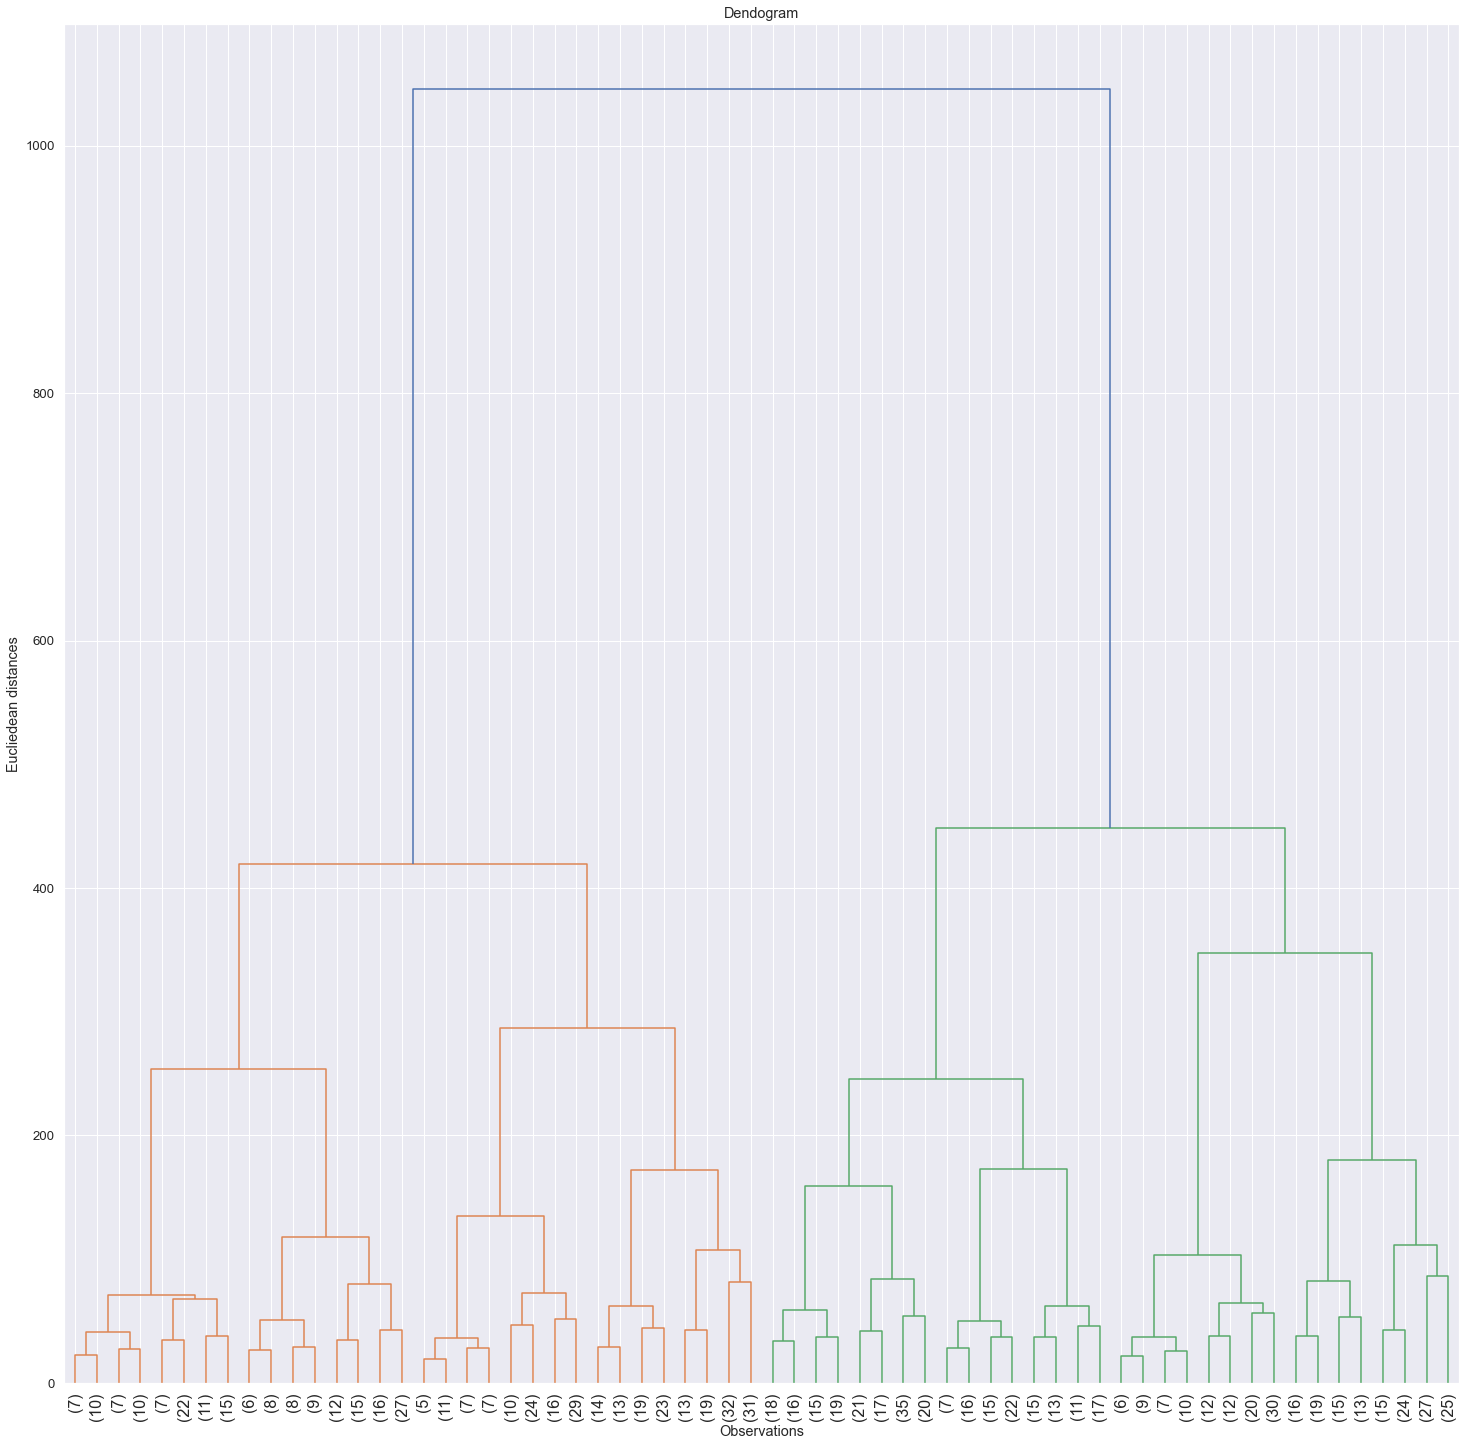

In [8]:
plt.figure(figsize=(25,25))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='level',color_threshold=None,
                          p=5,leaf_font_size=16)
plt.title("Dendogram")
plt.xlabel("Observations")
plt.ylabel("Eucliedean distances")
plt.show()

### Fitting hierachical cluster

In [9]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [10]:
y_hc = hc.fit_predict(X)

In [11]:
y_hc

array([1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 2, 1, 0,

In [12]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [13]:
y

,Cluster
0,1
1,2
2,0
3,2
4,0
...,...
995,1
996,0
997,0
998,0


In [14]:
y['Cluster'].unique()

array([1, 2, 0], dtype=int64)

In [15]:
y['Cluster'].value_counts()

0    463
2    277
1    260
Name: Cluster, dtype: int64

In [16]:
newdf = pd.concat([df,y],axis=1)

In [17]:
newdf

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC,Cluster
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,2
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0


In [18]:
result = pd.DataFrame(newdf["Cluster"])

In [19]:
result

,Cluster
0,1
1,2
2,0
3,2
4,0
...,...
995,1
996,0
997,0
998,0


In [20]:
result.replace({0: 'A', 1: 'B', 2: 'C'},inplace=True)

In [21]:
result

,Cluster
0,B
1,C
2,A
3,C
4,A
...,...
995,B
996,A
997,A
998,A


### Analysis of clusters

In [22]:
meandf = newdf.groupby(by='Cluster').mean()

In [23]:
meandf

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
Cluster,,,,,,,,,,,,,,,,,,,,
0,24.663067,11.328294,7.477322,48.282937,0.457883,0.012959,0.034557,0.183585,0.161987,0.041037,0.207343,0.181425,0.064795,0.073434,0.025918,0.244060,0.511879,0.492441,0.211663,0.295896
1,74.907692,12.873077,7.203846,63.596154,0.461538,0.007692,0.050000,0.192308,0.150000,0.050000,0.188462,0.169231,0.065385,0.069231,0.030769,0.253846,0.523077,0.503846,0.234615,0.196154
2,68.379061,10.093863,7.444043,37.169675,0.498195,0.032491,0.028881,0.245487,0.137184,0.068592,0.194946,0.133574,0.061372,0.093863,0.018051,0.259928,0.487365,0.483755,0.249097,0.281588


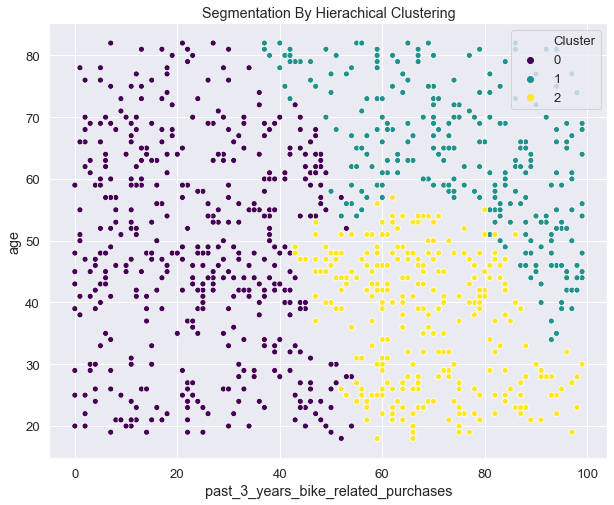

In [24]:
x_axis = newdf['past_3_years_bike_related_purchases']
y_axis = newdf['age']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=newdf['Cluster'],palette='viridis')
plt.title('Segmentation By Hierachical Clustering')
plt.show()

**Cluster 2 are best customer targets by business**

In [25]:
meandf.rename({0: 'A', 1: 'B', 2: 'C'},inplace=True)

In [26]:
meandf

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
Cluster,,,,,,,,,,,,,,,,,,,,
A,24.663067,11.328294,7.477322,48.282937,0.457883,0.012959,0.034557,0.183585,0.161987,0.041037,0.207343,0.181425,0.064795,0.073434,0.025918,0.244060,0.511879,0.492441,0.211663,0.295896
B,74.907692,12.873077,7.203846,63.596154,0.461538,0.007692,0.050000,0.192308,0.150000,0.050000,0.188462,0.169231,0.065385,0.069231,0.030769,0.253846,0.523077,0.503846,0.234615,0.196154
C,68.379061,10.093863,7.444043,37.169675,0.498195,0.032491,0.028881,0.245487,0.137184,0.068592,0.194946,0.133574,0.061372,0.093863,0.018051,0.259928,0.487365,0.483755,0.249097,0.281588


### Combine with original + age dataset

In [27]:
df2 = pd.read_csv("newcustomer2.csv")

In [28]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
0,Chickie,Brister,Male,86,12/7/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63
1,Morly,Genery,Male,69,22/3/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50
2,Ardelis,Forrester,Female,10,28/8/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46
3,Lucine,Stutt,Female,64,28/1/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41
4,Melinda,Hadlee,Female,34,21/9/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,7/10/1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,61
996,Burk,Wortley,Male,22,17/10/2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,19
997,Melloney,Temby,Female,17,5/10/1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,66
998,Dickie,Cubbini,Male,30,17/12/1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,68


In [29]:
df3 = pd.concat([df2,result],axis=1)

In [30]:
df3

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Cluster
0,Chickie,Brister,Male,86,12/7/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63,B
1,Morly,Genery,Male,69,22/3/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50,C
2,Ardelis,Forrester,Female,10,28/8/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46,A
3,Lucine,Stutt,Female,64,28/1/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41,C
4,Melinda,Hadlee,Female,34,21/9/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,7/10/1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,61,B
996,Burk,Wortley,Male,22,17/10/2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,19,A
997,Melloney,Temby,Female,17,5/10/1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,66,A
998,Dickie,Cubbini,Male,30,17/12/1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,68,A


In [31]:
#df3.to_csv("final.csv",index=False)

### Cluster C Customers to be targeted for marketing

In [32]:
cluster_c = df3[df3["Cluster"] == "C"]

In [33]:
cluster_c

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,Cluster
1,Morly,Genery,Male,69,22/3/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50,C
3,Lucine,Stutt,Female,64,28/1/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41,C
7,Nancie,Vian,Female,74,27/12/1972,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.656250,48,C
8,Duff,Karlowicz,Male,50,28/4/1972,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,48,C
9,Barthel,Docket,Male,72,2/8/1985,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.640625,35,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Artemis,Swanson,Male,77,12/2/1977,Web Designer II,Argiculture,Mass Customer,N,Yes,13,5 Melvin Park,3810,VIC,Australia,5,979,0.416500,43,C
980,Tyne,Anshell,Female,71,8/4/1992,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,28,C
984,Pauline,Dallosso,U,82,NaN,Desktop Support Technician,IT,Affluent Customer,N,Yes,0,9594 Badeau Street,2050,NSW,Australia,10,985,0.408000,48,C
985,Lauralee,Fudge,Female,83,21/9/1987,Research Nurse,Health,Mass Customer,N,No,15,9460 Monument Park,3277,VIC,Australia,4,985,0.408000,33,C


## K-Means Clustering

In [34]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

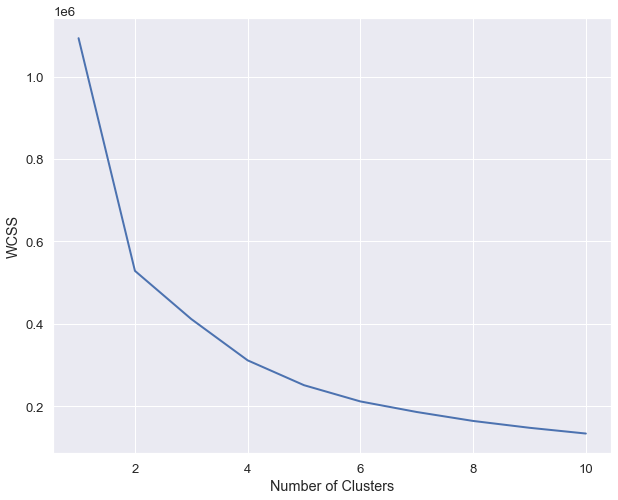

In [35]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [36]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [37]:
kmeans.fit(X.values)

KMeans(n_clusters=3, random_state=0)

### Results

In [38]:
df_segm_kmeans = df.copy()

In [39]:
df_segm_kmeans

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0


In [40]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [41]:
df_segm_kmeans

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC,Segment K-Means
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,2
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1


In [42]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [43]:
df_segm_analysis

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
Segment K-Means,,,,,,,,,,,,,,,,,,,,
0,77.094406,12.496503,7.328671,60.493007,0.451049,0.017483,0.045455,0.195804,0.153846,0.059441,0.181818,0.181818,0.062937,0.066434,0.027972,0.262238,0.524476,0.486014,0.230769,0.209790
1,22.834112,11.675234,7.406542,51.845794,0.457944,0.016355,0.037383,0.191589,0.165888,0.044393,0.203271,0.165888,0.065421,0.072430,0.023364,0.231308,0.523364,0.500000,0.226636,0.289720
2,62.986014,9.849650,7.451049,33.898601,0.506993,0.017483,0.027972,0.227273,0.129371,0.052448,0.209790,0.146853,0.062937,0.097902,0.024476,0.269231,0.468531,0.489510,0.227273,0.286713


In [44]:
#df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','past_3_years_bike_related_purchases']].groupby(['Segment K-Means']).count()

In [45]:
#df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [46]:
#df_segm_analysis

In [47]:
df_segm_analysis.rename({0: 'A',
                         1: 'B',
                         2: 'C'
                         },inplace=True)

In [48]:
df_segm_analysis

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC
Segment K-Means,,,,,,,,,,,,,,,,,,,,
A,77.094406,12.496503,7.328671,60.493007,0.451049,0.017483,0.045455,0.195804,0.153846,0.059441,0.181818,0.181818,0.062937,0.066434,0.027972,0.262238,0.524476,0.486014,0.230769,0.209790
B,22.834112,11.675234,7.406542,51.845794,0.457944,0.016355,0.037383,0.191589,0.165888,0.044393,0.203271,0.165888,0.065421,0.072430,0.023364,0.231308,0.523364,0.500000,0.226636,0.289720
C,62.986014,9.849650,7.451049,33.898601,0.506993,0.017483,0.027972,0.227273,0.129371,0.052448,0.209790,0.146853,0.062937,0.097902,0.024476,0.269231,0.468531,0.489510,0.227273,0.286713


In [49]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: 'A',
                                                                  1: 'B',
                                                                  2: 'C'
                                                                  })

In [50]:
df_segm_kmeans

,past_3_years_bike_related_purchases,tenure,property_valuation,age,gender_Male,gender_U,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Missing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_Yes,state_QLD,state_VIC,Segment K-Means,Labels
0,86,14,6,63.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,A
1,69,16,11,50.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,A
2,10,10,5,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,B
3,64,5,1,41.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,2,C
4,34,19,9,55.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,7,61.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,A
996,22,6,10,19.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,B
997,17,15,2,66.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,B
998,30,19,2,68.0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,B


### Plot the clusters

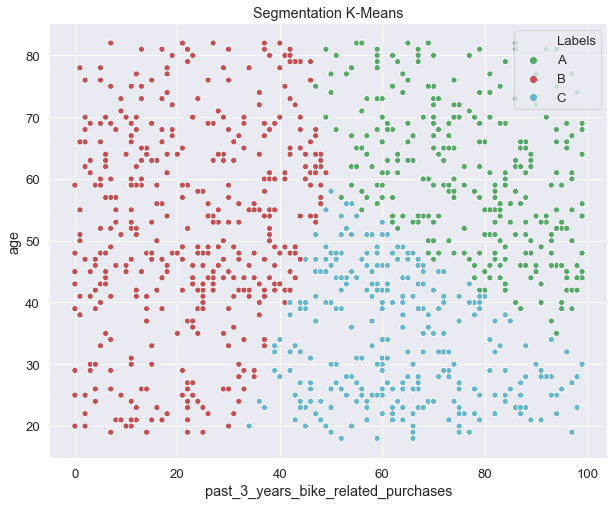

In [51]:
x_axis = df_segm_kmeans['past_3_years_bike_related_purchases']
y_axis = df_segm_kmeans['age']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c'])
plt.title('Segmentation K-Means')
plt.show()

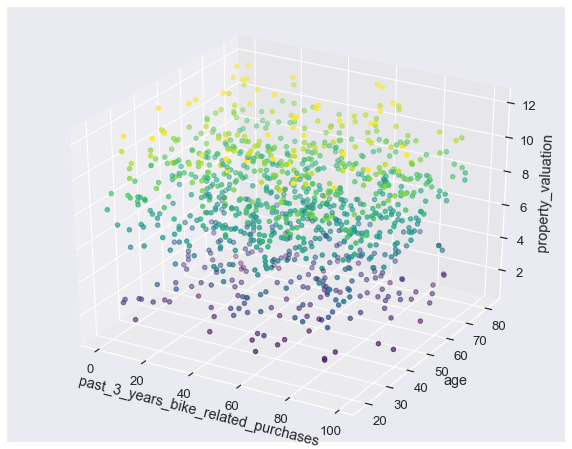

In [52]:
x_axis = df_segm_kmeans['past_3_years_bike_related_purchases']
y_axis = df_segm_kmeans['age']
z_axis = df_segm_kmeans['property_valuation']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('past_3_years_bike_related_purchases')
ax.set_ylabel('age')
ax.set_zlabel('property_valuation')

plt.show()